## Przygotowanie danych

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.options.display.float_format = "{:.1f}".format 

In [42]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('dataset_spine.csv', usecols=range(13))
data.head()

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Class_att
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal


In [3]:
data.shape
print('Liczba obserwacji: {},\nliczba atrybutów: {}'.format(data.shape[0], data.shape[1] - 1))

Liczba obserwacji: 310,
liczba atrybutów: 12


In [4]:
data.isna().sum()

Col1         0
Col2         0
Col3         0
Col4         0
Col5         0
Col6         0
Col7         0
Col8         0
Col9         0
Col10        0
Col11        0
Col12        0
Class_att    0
dtype: int64

Dane są kompletne - brak NaN.

In [5]:
data["Class_att"] = [1 if i =="Abnormal" else 0  for i in data.Class_att]
data.head()

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Class_att
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,1
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,1
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,1
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,1
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,1


In [13]:
from sklearn import preprocessing

x = data.drop(["Class_att"],axis=1)
y = data.Class_att.values
names = x.columns

scaler = preprocessing.StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=names)
x.head()

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12
0,0.147086,0.501369,-0.665177,-0.184950,-1.447647,-0.708059,0.951630,-1.015066,0.434293,1.167129,-1.196587,1.712368
1,-1.245864,-0.748769,-1.453001,-1.041521,-0.264385,-0.579556,-0.202553,-0.977816,1.316291,1.679551,-0.940325,-0.913941
2,0.484370,0.467932,-0.099262,0.273083,-0.897686,-0.795421,0.006694,0.639127,1.302680,1.635969,-1.227178,-0.615686
3,0.511390,0.711562,-0.411339,0.126128,-1.207303,-0.402288,-0.363213,0.259554,-0.105211,-0.176157,-1.345020,-0.652989
4,-0.626648,-0.789693,-1.274745,-0.215876,-0.733455,-0.490106,0.246670,1.643094,0.851472,-1.059666,-0.190502,-0.069858


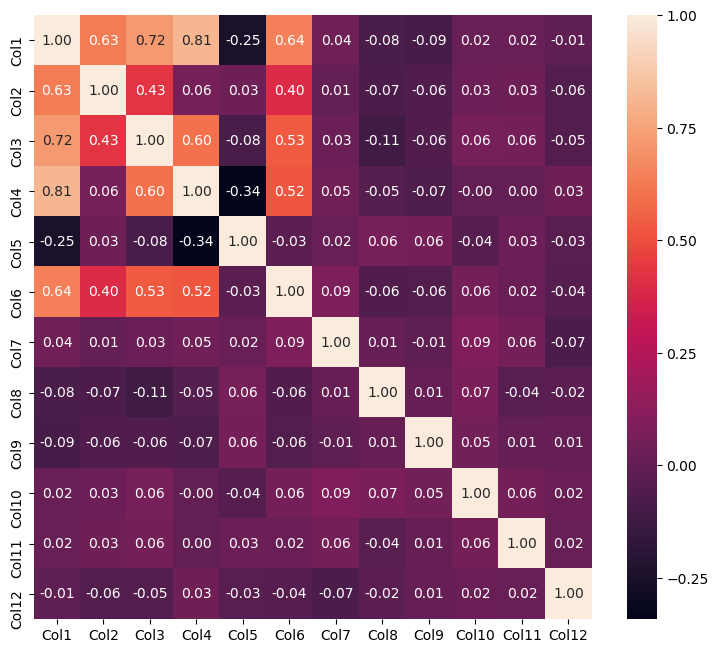

In [30]:
plt.figure(figsize=(9,8), dpi = 100)
sns.heatmap(x.corr(), annot=True, fmt='.2f')

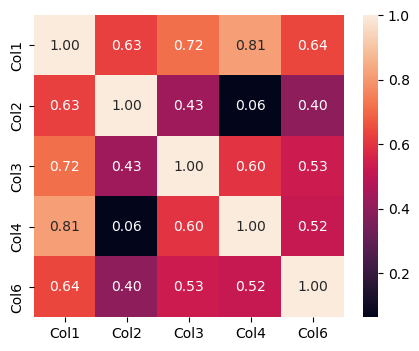

In [36]:
x = x.loc[:, ['Col1',
              'Col2',
              'Col3',
              'Col4',
              'Col6']]
plt.figure(figsize=(5,4), dpi = 100)
sns.heatmap(x.corr(), annot=True, fmt='.2f')

In [49]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

## Regresja liniowa

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

lr_model = LogisticRegression()
lr_model.fit(x_train, y_train)
y_pred = lr_model.predict(x_test)

print("Logistic regression test accuracy:", lr_model.score(x_test,y_test))
print()
print(classification_report(y_test, y_pred))

Logistic regression test accuracy: 0.8172043010752689

              precision    recall  f1-score   support

           0       0.64      0.67      0.65        24
           1       0.88      0.87      0.88        69

   micro avg       0.82      0.82      0.82        93
   macro avg       0.76      0.77      0.76        93
weighted avg       0.82      0.82      0.82        93



## Naiwny klasyfikator bayesowski

In [54]:
from sklearn.naive_bayes import GaussianNB

gnb_model = GaussianNB()
gnb_model.fit(x_train, y_train)
y_pred = gnb_model.predict(x_test)

print("Naive Bayes test accuracy:", gnb_model.score(x_test,y_test))
print()
print(classification_report(y_test, y_pred))

Naive Bayes test accuracy: 0.7741935483870968

              precision    recall  f1-score   support

           0       0.54      0.83      0.66        24
           1       0.93      0.75      0.83        69

   micro avg       0.77      0.77      0.77        93
   macro avg       0.73      0.79      0.74        93
weighted avg       0.83      0.77      0.79        93



## Algorytm k najbliższych sąsiadów (KNN)

In [55]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(3)
knn_model.fit(x_train, y_train)
y_pred = knn_model.predict(x_test)

print("KNN test accuracy:", knn_model.score(x_test,y_test))
print()
print(classification_report(y_test, y_pred))

KNN test accuracy: 0.7849462365591398

              precision    recall  f1-score   support

           0       0.58      0.58      0.58        24
           1       0.86      0.86      0.86        69

   micro avg       0.78      0.78      0.78        93
   macro avg       0.72      0.72      0.72        93
weighted avg       0.78      0.78      0.78        93



## Metoda wektorów nośnych (SVM)

In [ ]:
# to do

## Drzewa decyzyjne

In [6]:
# to do

## Losowy las decyzyjny

In [7]:
# to do